<font color='mediumblue'> **Projet : Consommation et production électrique en France** </font>

# Régional

#### 2.1 (Régional) Concaténer les données régionales annuelles

In [237]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import rcParams
import glob
import os

In [3]:
directory = '../data/data_rte'
file_pattern = 'eCO2mix_RTE*.zip'
specific_files = glob.glob(os.path.join(directory, file_pattern))
filtered_files1 = [file for file in specific_files if not file.startswith('eCO2mix_RTE_Annuel-Definitif_')]
filtered_files2 = [file for file in filtered_files1 if not file.endswith('2019.zip')]
filtered_files3 = [file for file in filtered_files2 if not file.endswith('2020.zip')]
#for file_path in filtered_files3:
#    print(file_path)

regional_df = pd.concat((pd.read_csv(filename, sep='\t', encoding='latin1', index_col=False, low_memory=False) for filename in filtered_files3))
regional_df.head(2)

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Thermique,Unnamed: 13
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2 (Régional) construire un index de datetime à partir des colonnes 'Date' et 'Heures'

In [90]:
regional = regional_df 

Format = '%Y-%m-%d %H:%M'
regional = regional_df.dropna(subset = ['Date', 'Heures'], how = "any")
regional['Datetime'] = pd.to_datetime(regional['Date'] + ' ' + regional['Heures'], format = Format)

C:\Users\eusou\AppData\Local\Temp\ipykernel_9436\3221431962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional['Datetime'] = pd.to_datetime(regional['Date'] + ' ' + regional['Heures'], format = Format)


#### 2.2.1 (Régional) Construire un Multindex 

In [91]:
# Setting a Multindex
regional = regional.set_index(['Périmètre','Datetime'])

In [92]:
# Dropping useless columns for the purposes of our analysis
regional = regional.drop(['Date', 'Heures', 'Nature', 'Prévision J-1', 'Prévision J'], axis = 1)

In [93]:
# Dropping specific rows from multiindex Pandas Dataframe
regional = regional.drop('France', level=0, axis=0) 

In [105]:
# Converting all DataFrame's D and '-' into nan, then the objects into numeric, then into float
regional = regional.replace(['ND', '-'], [np.nan, np.nan]).apply(pd.to_numeric, errors='coerce').astype(float)

# Checking that the entire DataFrame is converted (2 possibilities)
regional.info() or regional.dtypes

In [109]:
# Dropping columns containing only NaNs
regional = regional.dropna(how='all', axis=1)

In [111]:
# Dropping rows containing only NaNs
regional = regional.dropna(how='all', axis=0)

#### 2.3 (Régional) Tracer sur un même graphique la consommation des différentes régions en fonction du temps

In [121]:
# Creating a new variable (regional_consumption) that stocks energy consumption of each region on a monthly base. 
regional_consumption = regional['Consommation'].unstack(level=0).resample('M').sum()

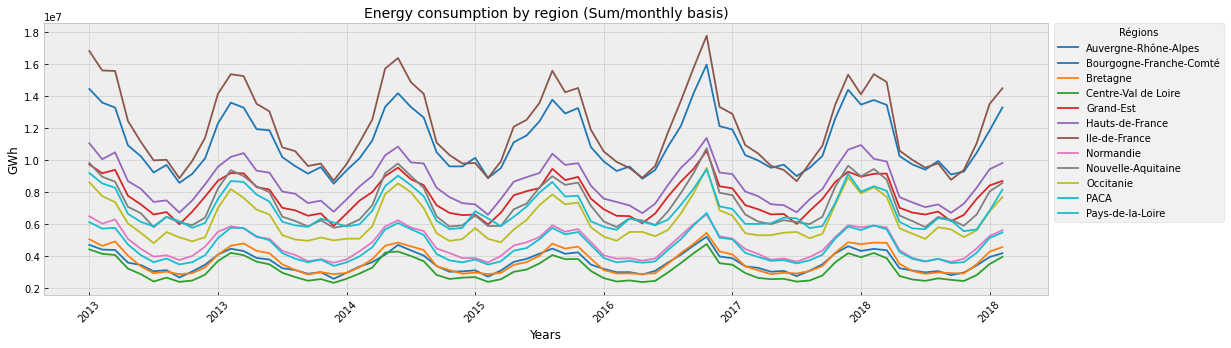

In [167]:
# Plotting Consumption of each region over time (2013-2018)

## Defining Figure Size
rcParams['figure.figsize'] = 18, 5

## Defining type (lines) and color (cmap) of the plot 
regional_consumption.plot(cmap ='tab10', linewidth = 1.8)

## Defining style, legend, title, and labels (x and y axis) 
plt.style.use('bmh')
plt.legend(loc='upper right', title = 'Régions', bbox_to_anchor=(1.18, 1.02))
plt.title('Energy consumption by region (Sum/monthly basis)', fontsize = 14)
plt.xlabel('Years', fontsize = 12)
plt.xticks(rotation=45)
plt.ylabel('GWh', fontsize = 12)

## Showing Plot 
plt.show()

#### 2.3.1 Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)

In [172]:
# Yes (yet to develop)

### 2.4.1 (Régional) Quelles régions sont les plus consommatrices ? 

In [177]:
# Creating a new variable (regional_consumption_average) that stocks energy consumption of each region (yealy average). 
regional_consumption_average = regional['Consommation'].unstack(level=0).mean()

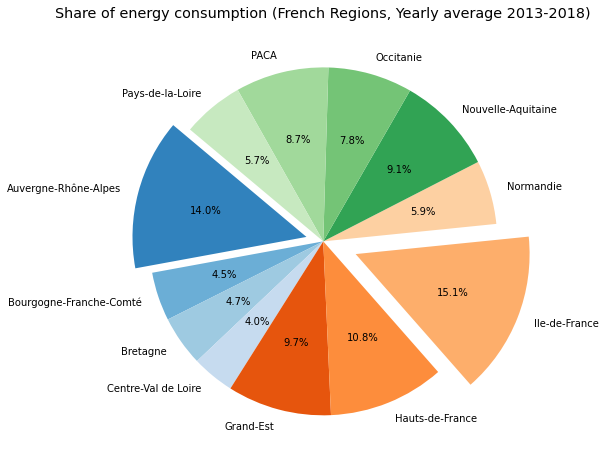

In [265]:
## Plotting share of energy consumption of regions
 
# Calculate the average regional consumption
regional_consumption_average = regional['Consommation'].unstack(level=0).mean()

# Create a pie chart
plt.figure(figsize=(15, 8)) 
plt.style.context('dark_background')

# Define labels for the pie chart (regions)
labels = regional_consumption_average.index
values = regional_consumption_average.values
#colors = plt.cm.tab20c(range(len(labels)))
explode = (0.1, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0) 
plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Share of energy consumption (French Regions, Yearly average 2013-2018)')

plt.show()

### 2.4.2 (Régional) Même question en ramenant la réponse au nombre d'habitants ? 

In [20]:
### Calculate each reagion's consumption per capita.

# 1) Import data from regions' population
# 2) Separate data from 2007
# 3) Integrate column Recensement 2007 into dataframe regions energy consump.




In [27]:
#pip install xlrd

In [22]:
file_path = 'your_file.xlsx'
reg_pop = pd.read_excel('../data/fr_population.region.departement.xls')

In [23]:
### ==== Learning about Lambda function
# arr = list(range(10))
# def square(elt):
#     return elt*elt
# square = lambda elt: elt*elt 
# tuple(map(square , arr))

In [24]:
# arr = list(range(20))
# iterator = filter(lambda elt: elt % 2 == 0, arr)
# for elt in iterator:
    

In [28]:
#### ==== Map // Filter // Reduce // Lambda

# reg_pop.dropna(how='all')
# reg_pop = reg_pop.dropna()

# columns = ['Régions'] + list(map(lambda d: 'Recensement_' + str(d), [1990, 1999, 2007, 2022]))

# print(columns)

reg_pop.columns=["Régions", "Recensement_1990", "Recensement 1999","Recensement 2007", "Recensement 2022"]


# reg_pop = reg_pop.apply(lambda elt: pd.to_numeric(elt, ....) , errors = 'coerce')

# reg_pop

In [29]:
# Separating one column and transforming it into int

reg_popx = reg_pop.loc[:, ['Régions', 'Recensement 2007']] \
                  .copy() \
                  .astype({
                    'Régions': str, 
                    'Recensement 2007': int
                  })


#reg_popx.info()

ValueError: invalid literal for int() with base 10: '1er janvier 2008'

In [ ]:
# Separating one column and transforming it into int (2nd Method)

# reg_pop2 = reg_pop[['Régions', 'Recensement 2007']]
# reg_pop2['Recensement 2007'] = reg_pop2['Recensement 2007'].astype(int)


In [30]:
#Deleting a specific row(s)--- > Corse and France
reg_popx = reg_popx.drop(reg_popx.index[[4, 13]])

NameError: name 'reg_popx' is not defined

In [ ]:
reg_popx.columns = ["Régions","Population(2007)"]
reg_popx

##Setting single index
#reg_popx = reg_popx.set_index("Régions")


,Régions,Population(2007)
1,Auvergne-Rhône-Alpes,7459092
2,Bourgogne- Franche-Comté,2802519
3,Bretagne,3149701
4,Centre - Val de Loire,2531588
6,Grand Est,5521452
7,Hauts-de-France,5931091
8,Île-de-France,11659260
9,Normandie,3293092
10,Nouvelle Aquitaine,5671076
11,Occitanie,5419946


In [ ]:
reg_conso = regions['Consommation']
reg_conso_reset = reg_conso.reset_index()
reg_conso_reset.columns = ["Régions","Year","Consommation" ]
reg_conso_reset.set_index("Régions")
#reg_conso_reset


# reg_c = reg_conso_reset.groupby(pd.Grouper(key='Year', freq='1Y')).sum()
# reg_c
# reg_cons2
# #reg_cons2.groupby(pd.Grouper(key='Datetime', freq='1Y')).sum()



,Year,Consommation
Régions,,
Ile-de-France,2016-01-01 00:00:00,8885.0
Ile-de-France,2016-01-01 00:15:00,NaN
Ile-de-France,2016-01-01 00:30:00,8709.0
Ile-de-France,2016-01-01 00:45:00,NaN
Ile-de-France,2016-01-01 01:00:00,8343.0
...,...,...
Bourgogne-Franche-Comté,2018-12-31 22:45:00,NaN
Bourgogne-Franche-Comté,2018-12-31 23:00:00,2719.0
Bourgogne-Franche-Comté,2018-12-31 23:15:00,NaN


In [ ]:
a = reg_conso_reset.set_index('Year')

In [ ]:
a.groupby(['Régions', pd.Grouper(freq = 'M')]).Consommation.sum()

Régions               Year      
Auvergne-Rhône-Alpes  2013-01-31    14455649.0
                      2013-02-28    13605248.0
                      2013-03-31    13293588.0
                      2013-04-30    10929625.0
                      2013-05-31    10247670.0
                                       ...    
Pays-de-la-Loire      2018-08-31     3562885.0
                      2018-09-30     3619587.0
                      2018-10-31     4205672.0
                      2018-11-30     5131683.0
                      2018-12-31     5473773.0
Name: Consommation, Length: 864, dtype: float64

In [ ]:
#=======WIP
reg_cons = regions['Consommation'].unstack(level=0).resample('Y').sum()
reg_cons = reg_cons.drop(reg_cons.index[[0,1,2,3,4]]) 
# or reg_cons = reg_cons.drop(labels=range(0,4), axis=0)

reg_cons2 = reg_cons.reset_index()
#reg_cons2.reset_indexlevel(['Périmètre']
reg_cons2


Périmètre,Datetime,Ile-de-France,Bretagne,Hauts-de-France,Normandie,PACA,Centre-Val de Loire,Auvergne-Rhône-Alpes,Occitanie,Pays-de-la-Loire,Bourgogne-Franche-Comté,Nouvelle-Aquitaine,Grand-Est
0,2018-12-31,141593960.0,45053105.0,101815048.0,56079329.0,80884421.0,37557332.0,134068058.0,76903481.0,54793090.0,42829648.0,87595610.0,91868917.0


### 2.4.3 (Régional)  Même question en ramenant la réponse au km2 ? Que pouvez-vous dire des résultats ? 

# 2.5 (Régional) Afficher la production nucléaire par région en ftc du temps 

Dans quelles régions sont situées les centrales nucléaires ?

In [ ]:
#regions['Nucléaire']

In [ ]:
regions_s_e

Périmètre,Ile-de-France,Bretagne,Hauts-de-France,Normandie,PACA,Centre-Val de Loire,Auvergne-Rhône-Alpes,Occitanie,Pays-de-la-Loire,Bourgogne-Franche-Comté,Nouvelle-Aquitaine,Grand-Est
Datetime,,,,,,,,,,,,
2013-12-31,69062.0,2802751.0,6505174.0,1919243.0,224469.0,3016843.0,1471095.0,4377371.0,1957381.0,561235.0,1411184.0,7349807.0
2014-12-31,75683.0,2794737.0,7286689.0,2093275.0,211670.0,3253267.0,1528810.0,4381900.0,2145888.0,748802.0,1641289.0,7955055.0
2015-12-31,105189.0,3303791.0,9935662.0,2519957.0,210568.0,3856875.0,1599086.0,4636542.0,2447454.0,1390946.0,1848885.0,10333355.0
2016-12-31,121733.0,2959243.0,9886944.0,2368603.0,217101.0,3604383.0,1715615.0,5150972.0,2524570.0,1559115.0,1848613.0,9878535.0
2017-12-31,183248.0,3091197.0,11546755.0,2589852.0,234711.0,3778307.0,2016423.0,6255812.0,2698987.0,2202769.0,2462390.0,11134701.0
2018-12-31,242618.0,3607709.0,14386492.0,3035922.0,199555.0,4086049.0,2163064.0,6504104.0,3263357.0,2621904.0,3473004.0,12677878.0


In [ ]:
#regions_nuc.index.strftime(date_format='%Y')

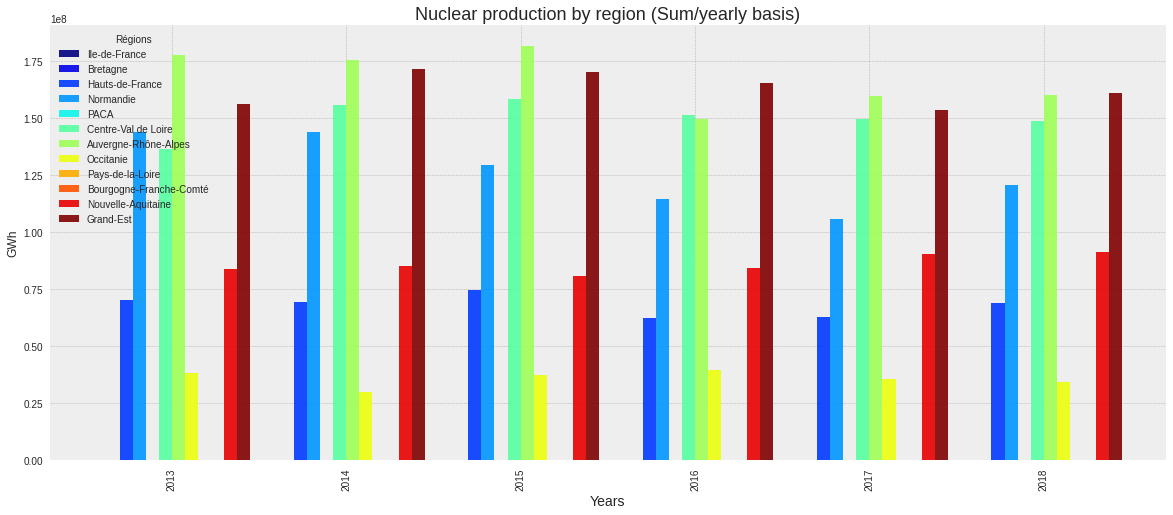

In [ ]:
regions['Nucléaire'] = pd.to_numeric(regions['Nucléaire'], errors='coerce')
regions['Nucléaire'].dropna(inplace=True)

regions_nuc = regions['Nucléaire'].unstack(level=0).resample('Y').sum()
regions_nuc = regions_nuc.dropna(how='all')
regions_nuc
#regions_nucx.plot.area(cmap ='tab20c')

rcParams['figure.figsize'] = 20, 8

regions_nuc.index = regions_nuc.index.strftime(date_format='%Y')
regions_nuc.plot(kind = 'bar', width = 0.9, cmap = 'jet', alpha = 0.9)
plt.style.use('bmh')
plt.legend(loc='upper left', title = 'Régions')
plt.title('Nuclear production by region (Sum/yearly basis)', fontsize = 18)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('GWh', fontsize = 12)

plt.show()

In [ ]:
#regions_nuc

<AxesSubplot:xlabel='Datetime'>

# 2.6 (Régional) Quelles régions produisent le plus de solaire / éolien ? 

In [ ]:
#regions.info() #Eolien is object(str). So I have to converted it to float#

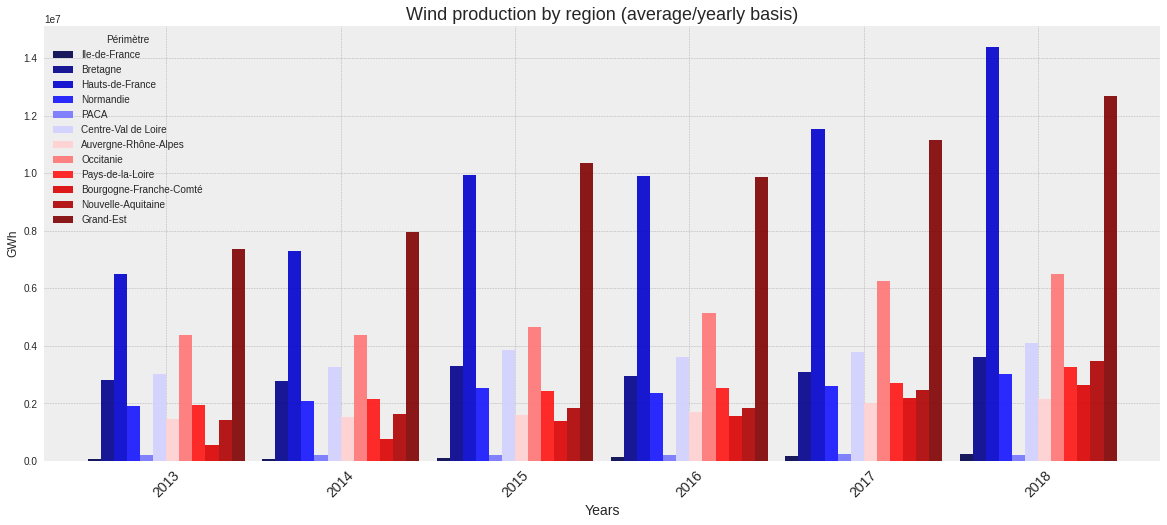

In [ ]:
#Calculate mean of solar and wind energy over the period 2012-2018 for each region.

# Calculating the yearly mean of Wind energy for each region.
regions['Eolien'] = pd.to_numeric(regions['Eolien'], errors = 'coerce')
regions['Eolien'].dropna(inplace = True)
regions_s_e = regions['Eolien'].unstack(level=0).resample('Y').sum()
#regions_s_e.plot.area(cmap = 'bwr', alpha = 0.9)

rcParams['figure.figsize'] = 20, 8
ax = regions_s_e.plot(kind = 'bar', width = 0.9, cmap = 'seismic', alpha = 0.9)
plt.style.use('bmh')
x_labels = regions_s_e.index.strftime('%Y') 
ax.set_xticklabels(x_labels, rotation=45, fontsize = 14)  
plt.title('Wind production by region (average/yearly basis)', fontsize = 18)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('GWh', fontsize = 12)

plt.show()
#plt.style.use("default")


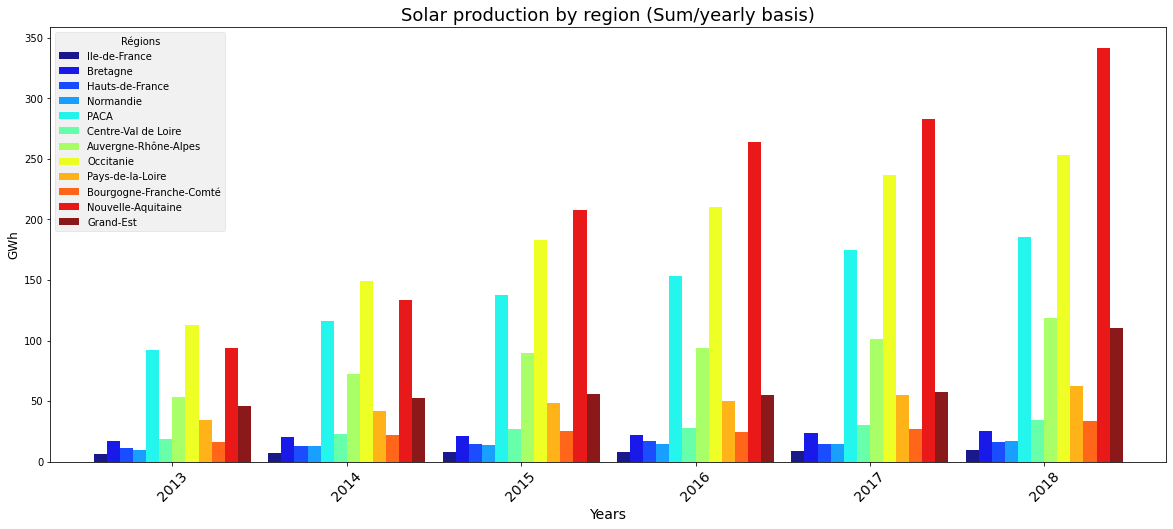

In [ ]:
#Calculate mean of solar and wind energy over the period 2012-2018 for each region.

# Calculating the yearly mean of Solar energy for each region.
regions['Solaire'] = pd.to_numeric(regions['Solaire'], errors = 'coerce')
regions['Solaire'].dropna(inplace = True)
regions_s = regions['Solaire'].unstack(level=0).resample('Y').mean()

rcParams['figure.figsize'] = 20, 8

regsol = regions_s.plot(kind = 'bar', width = 0.9, cmap = 'jet', alpha = 0.9)
plt.style.use('bmh')
x_labels = regions_s.index.strftime('%Y') 
regsol.set_xticklabels(x_labels, rotation=45, fontsize = 14)  
plt.legend(loc='upper left', title = 'Régions')
plt.title('Solar production by region (Sum/yearly basis)', fontsize = 18)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('GWh', fontsize = 12)

plt.show()
#plt.style.use("default")


In [ ]:
regions

Nature        Date  \
Périmètre               Datetime                                               
Ile-de-France           2016-01-01 00:00:00  Données définitives  2016-01-01   
                        2016-01-01 00:15:00  Données définitives  2016-01-01   
                        2016-01-01 00:30:00  Données définitives  2016-01-01   
                        2016-01-01 00:45:00  Données définitives  2016-01-01   
                        2016-01-01 01:00:00  Données définitives  2016-01-01   
...                                                          ...         ...   
Bourgogne-Franche-Comté 2018-12-31 22:45:00  Données définitives  2018-12-31   
                        2018-12-31 23:00:00  Données définitives  2018-12-31   
                        2018-12-31 23:15:00  Données définitives  2018-12-31   
                        2018-12-31 23:30:00  Données définitives  2018-12-31   
                        2018-12-31 23:45:00  Données définitives  2018-12-31   

                                            Heures  Consommation Thermique  \
Périmètre               Datetime                                             
Ile-de-France           2016-01-01 00:00:00  00:00        8885.0     293.0   
                        2016-01-01 00:15:00  00:15           NaN       NaN   
                        2016-01-01 00:30:00  00:30        8709.0     309.0   
                        2016-01-01 00:45:00  00:45           NaN       NaN   
                        2016-01-01 01:00:00  01:00        8343.0     309.0   
...                                            ...           ...       ...   
Bourgogne-Franche-Comté 2018-12-31 22:45:00  22:45           NaN       NaN   
                        2018-12-31 23:00:00  23:00        2719.0     178.0   
                        2018-12-31 23:15:00  23:15           NaN       NaN   
                        2018-12-31 23:30:00  23:30        2624.0     178.0   
                        2018-12-31 23:45:00  23:45           NaN       NaN   

                                            Nucléaire Eolien  Solaire  \
Périmètre               Datetime                                        
Ile-de-France           2016-01-01 00:00:00       NaN   18.0      0.0   
                        2016-01-01 00:15:00       NaN    NaN      NaN   
                        2016-01-01 00:30:00       NaN   16.0      0.0   
                        2016-01-01 00:45:00       NaN    NaN      NaN   
                        2016-01-01 01:00:00       NaN   13.0      0.0   
...                                               ...    ...      ...   
Bourgogne-Franche-Comté 2018-12-31 22:45:00       NaN    NaN      NaN   
                        2018-12-31 23:00:00       NaN   19.0      0.0   
                        2018-12-31 23:15:00       NaN    NaN      NaN   
                        2018-12-31 23:30:00       NaN   21.0      0.0   
                        2018-12-31 23:45:00       NaN    NaN      NaN   

                                            Hydraulique Pompage Bioénergies  \
Périmètre               Datetime                                              
Ile-de-France           2016-01-01 00:00:00        10.0     NaN       137.0   
                        2016-01-01 00:15:00         NaN     NaN         NaN   
                        2016-01-01 00:30:00        10.0     NaN       148.0   
                        2016-01-01 00:45:00         NaN     NaN         NaN   
                        2016-01-01 01:00:00        10.0     NaN       149.0   
...                                                 ...     ...         ...   
Bourgogne-Franche-Comté 2018-12-31 22:45:00         NaN     NaN         NaN   
                        2018-12-31 23:00:00        70.0    -1.0        32.0   
                        2018-12-31 23:15:00         NaN     NaN         NaN   
                        2018-12-31 23:30:00        83.0    -1.0        32.0   
                        2018-12-31 23:45:00         NaN     NaN         NaN   

                        

# 2.7 (Régional) Observer les informations concernant la région AuRA.

In [ ]:
# Getting data from a specific row when using multindex
# rhone_alpes = regions.xs('Auvergne-Rhône-Alpes') 
# rhone_alpes = rhone_alpes.drop(['Nature', 'Date', 'Heures'], axis = 1)
# rhone_alpes = rhone_alpes.replace('Nan', np.nan)
# rhone_alpes = rhone_alpes.replace('-', np.nan)
# rhone_alpes = rhone_alpes.apply(pd.to_numeric, errors = 'coerce')
# rhone_alpes = rhone_alpes.astype(float)
#pd.set_option('display.max_columns', None)

#Compact (correct) version:
rhone_alpes = regional_df.xs('Auvergne-Rhône-Alpes').drop(['Nature', 'Date', 'Heures'], axis = 1)
rhone_alpes = rhone_alpes.replace(['Nan', '-'], [np.nan, np.nan]).apply(pd.to_numeric, errors = 'coerce').astype(float)
rhone_alpes.dropna(how='all', inplace=True, axis=0)
rhone_alpes.dropna(how='all', inplace=True, axis=1)

#rhone_alpes.sample(5)


Retrouver la signification du signe des échanges

#### 2.8 (Régional) Pourquoi la région est-elle autant exportatrice ? 

In [ ]:
#xxxx

#### 2.9 (Régional) Afficher la 'consommation - sum(productions)' pour chaque région

In [ ]:
# ==================================================== #
## 1-> Clean data
## 2 -> Calculate yearly Consumption of each reagion
## 3 -> Calculate yearly production of 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 
###     'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies' and Bioénergies all combined for each region.
## 4 -> Calculate Total Consumption and 2012-2018 Total Production for each region.
# ==================================================== #

In [ ]:
# ==================================================== #
# 1-> Clean data

each_reg = regions
each_reg = each_reg.drop(['Nature','Date','Heures','Prévision J-1','Prévision J'], axis=1)
## How to check all index entries in a multiindex pandas (without iterating)? 
# unique_index_entries = each_reg.index.get_level_values(0).unique()
each_reg.replace(['Nan', '-'], [np.nan, np.nan]).apply(pd.to_numeric, errors = 'coerce').astype(float)
each_reg.sample(1)

# ==================================================== #

,,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13,Fioul,Charbon,Gaz,Taux de Co2,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Fioul - TAC,Fioul - Cogén.,Fioul - Autres,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
Périmètre,Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pays-de-la-Loire,2018-04-27 14:30:00,3083.0,333.0,NaN,699.0,226.0,4.0,NaN,43.0,1778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


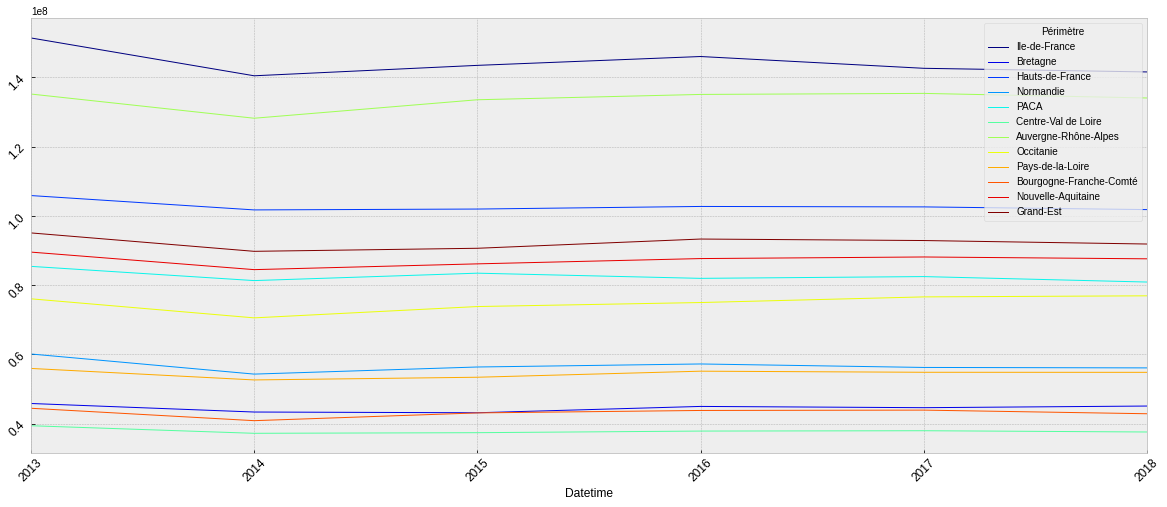

In [ ]:
# ==================================================== #
# 2 -> Calculate yearly Consumption of each reagion

each_reg_cons = each_reg['Consommation'].unstack(level=0).resample('Y').sum()
rcParams['figure.figsize'] = 20, 8
each_reg_cons.plot(cmap = 'jet', linewidth = 1)
plt.style.use('seaborn')

x_labels = each_reg_cons.index.strftime('%Y') 
plt.xticks(x_labels, rotation=45, fontsize=12)

#### WORKING HERE! How to add y ticks
plt.yticks(rotation=45, fontsize=12)

#plt.yticks(y_labels, rotation=45, fontsize=12)


# # plt.legend(loc='upper left', title = 'Régions')
# # plt.title('Solar production by region (Sum/yearly basis)', fontsize = 18)
# # plt.xlabel('Years', fontsize = 14)
# # plt.ylabel('GWh', fontsize = 12)

plt.show()



# ==================================================== #

#### 2.10 (Régional) Quelles régions sont autonomes ? en exces ? en déficit ?

#### 2.11 (Régional) Comparer ce résultat à la colonne 'Ech. physiques'

#### 2.12 (Régional) Bonus : reconstruire les flux inter-régionaux ...

### 2.13 (Régional) Etude de la production solaire

### 2.14 (Régional) Mêmes questions pour l'éolien

**Objectifs**
    
1. Charger et nettoyer des données : read_csv, parse date, concat
2. Manipuler les données pour mieux les comprendre : groupby, pivot, stack/unstack

## Création des dataframes
**TODO**
        
1. Créer deux dataframes:
    - le 1er en concaténant les données nationales annuelles 
    - le 2nd en concaténant les données régionales annuelles
    - il faudra construire un index de datetime à partir des colonnes 'Date' et 'Heures'

**Aide**
- bien lire la note sur les données RTE afin de comprendre sur quelles données on travaille ...
- la méthode read_csv (pandas) peut lire les fichiers zip ;-) (encoding: latin-1, séparateur de colonnes: \t)
- un tips pour détecter l'encoding: https://superuser.com/questions/301552/how-to-auto-detect-text-file-encoding
- la méthode listdir (os) peut vous aider à lister tous les fichiers d'un dossier, startswith à sélectionner ceux qui vous intéressent
- pensez à "droper" les colonnes qui ne contiennent pas d'information
- pour le dataframe des données régionales, vous pouvez utiliser un multiindex
- certaines colonnes sont vides ? https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Notes sur les données RTE** 
- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)
- Leur format n'est pas optimal : un peu de manipulation est nécessaire afin de pouvoir les exploiter. Pas de panique, il faut juste procéder par étape !
    1. Chargez un des fichiers directement avec read_csv (n'importe lequel, ils sont tous construits de la même façon)
    2. Affichez le dataframe obtenu, et essayez de comprendre ce qui cloche ...
    3. Les quelques lignes de code suivante permettent d'afficher la 1ere et la 10ème ligne contenues dans un fichier. Est-ce que le problème apparait plus clairement ? (pensez à modifier le chemin d'accès...)
    4. Ecrivez une fonction qui permet de charger correctement un des fichiers
    5. Vous pouvez maintenant utiliser cette fonction pour créer votre dataframe en concaténant les fichiers

**Plus d'informations sur les données :** <br/> 
- https://www.rte-france.com/eco2mix <br/>
- https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

Les données que nous allons traiter sont sous un format nouveau, il peut s'avérer difficile de les importer pour vous : fixez vous un objectif à ne pas passer plus de 2h à les importer. Si vous dépassez ce temps, je vous conseille de vous référer aux codes cachés que je vous transmets ci-dessous et de vous replonger dedans plus tard afin que vous ayez le temps d'explorer les données.

<details><summary>Code import données nationales</summary><br>
def create_datetime_index(df):<br/>
    df['DateTime'] = pd.to_datetime(df['Date'].map(str) + ' ' + df['Heures'].map(str))<br/>
    df.drop(['Date', 'Heures'], axis=1, inplace=True)<br/>
    df.set_index('DateTime', inplace=True)<br/>
    return <br/>

def read_rte_file(file_name):<br/>
    df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, header=None, skiprows=1, na_values='ND')<br/>
    df.drop(df.columns[-1], axis=1, inplace=True)<br/>
    df_titles = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, nrows=0)<br/>
    df.columns = df_titles.columns<br/>
    return df<br/>

DATA_FILE = 'data/data_rte/'<br/>

files = [f for f in listdir(DATA_FILE) if f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

df_all = []<br/>

for f in files:<br/>
    df = read_rte_file(DATA_FILE+f)<br/>
    df_all.append(df)<br/>
df_all = pd.concat(df_all)<br/>
df_all = df_all[(\~df_all['Date'].isna())&(~df_all['Heures'].isna())]<br/>
create_datetime_index(df_all)<br/>
df_all.describe()<br/>
</details>

**Note : In a loop it is not a good idea to concat the dataframe at each step, because it will sort each dataframe and this will takes a lot of time. A better solution is to create a list of dataframes and concat at the end of the loop (as is done here).**

<details><summary>Code import données régionales</summary><br>
files = [f for f in listdir(DATA_FILE) if not f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

list_reg = set([f[len('eCO2mix_RTE_'):-len('_Annuel-Definitif_2013.zip')] for f in files])<br/>

df_all_reg = {}<br/>

for reg in list_reg:<br/>
    df_reg = []<br/>
    for f in files :<br/>
        if reg in f :<br/>
            df = read_rte_file(DATA_FILE+f)<br/>
            df.drop(len(df)-1, inplace=True)<br/>
            create_datetime_index(df)<br/>
            df_reg.append(df)<br/>
    df_reg = pd.concat(df_reg)<br/>
    df_reg.drop(['Périmètre', 'Nature'], axis=1, inplace=True)<br/>
    df_reg.dropna(how='all', inplace=True)<br/>
    df_all_reg[reg] =df_reg<br/>
df_all_reg = pd.concat(df_all_reg, axis=1)<br/>
</details>

## Exploration du dataset

### Réflexion

A présent vous savez ce que vous avez dans vos données (cf. https://www.rte-france.com/eco2mix)<br/>

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et les premières statistiques descriptives que vous avez trouvées : quelles questions vous posez-vous sur les données ? Qu'avez-vous envie d'explorer ? (essayez de ne pas vous laisser biaiser par les titres du Notebook)

### Mise en application

**TODO**
    
L'objectif ici est de **comprendre les données** présentes dans les deux dataframes que vous avez créés. Réfléchissez aux descripteurs statistiques les plus appropiés pour chaque question.  
<br/>

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>
2. Dataset régional
    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    - Quelles régions sont les plus consommatrices ? Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ?
    - Afficher la production nucléaire par région en ftc du temps. Dans quelles régions sont situées les centrales nucléaires ?
    - Quelles régions produisent le plus de solaire / éolien ?
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?

**Aide**
- la méthode **.plot()** fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode **swaplevel** peut vous aider
- attention aux **nan** pour les plots..

### Dataset national

#### consommation nationale en fonction du temps

#### production des différentes sources

#### production nucléaire, consommation et échanges aux frontières

#### fonctionnement de base ou ponctuel ?

### Dataset régional


Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,...
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

#### Manipulation de notre dataframe avec les index : récupération de la consommation par région

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

#### consommation en fonction du temps

#### différences comportementales entre les régions

#### les plus consommatrices

#### production nucléaire

#### production solaire / éolien


## Comparaison des situations régionales

**TODO**

1. Autonomie électrique des régions : 
    - Afficher la 'consommation - sum(productions)' pour chaque région
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    - Comparer ce résultat à la colonne 'Ech. physiques'
    - Bonus: reconstruire les flux inter-régionaux ...

    
2. Etude de la production solaire :
    - Quelle région produit le plus (en moyenne et au max) ? 
    - Quelle évolution sur les dernières années ?
    - Quelle région a le meilleur taux 'énergie produite / puissance installée' ? (la puissance installée peut être assimilée au maximum produit, attention cette capacité peut augmenter dans le temps...)

    
3. Mêmes questions pour l'éolien
    

**Aide**


- Les méthodes groupby, unstack, ou pivot sont très utiles pour manipuler des dataframes


### Autonomie électrique des régions

## Etude des consommations 

**TODO**


1. Afficher les moyennes des consommations régionales pour chaque année, avec et sans standardisation. Quelles informations visualisez vous ?
    
2. Faire pareil avec la moyenne de consommation selon le jour de la semaine.

3. Tracer les consommations horaires (par heure) moyenne par région en décembre et en juin. Peut-on observer les différences d'ensoleillement entre les régions ?

4. Tracer ces mêmes courbes, en ne sélectionnant que les jours de semaine, puis que les jours de week end. Quelles différences de comportement peut-on observer ?


**Aide**

- un DatetimeIndex possède de nombreux attributs et méthodes utiles: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
- Regarder la doc des méthodes groupby, unstack, pivot...
- Si besoin, utiliser la méthode seaborn.heatmap pour visualiser vos résultats (cmap="YlGnBu")



#### moyennes des consommations régionales pour chaque année, avec et sans standardisation

#### moyenne de consommation selon le jour de la semaine

#### consommations décembre vs juin

#### consommation semaine vs week end

# Relation entre les features / variables

## Liens productions / consommation

**TODO**
        
- Afficher les correlations entre toutes les productions et la consommation
- Quelles éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?
- Quel indice montre que la consommation 'cause' la production avec du gaz ?
- Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")
- Choisissez une ou deux régions et observez ces mêmes corrélations.

BONUS : Visualisation de la PCA :
- La consommation nationale et la production nucléaire sont fortement correlées. Tracer un scatterplot de l'une en fct de l'autre.
- Effectuer une PCA pour passer de deux dimensions à une seule, puis visualiser sur le plot précédent la composante obtenue.

Le nucléaire produit beaucoup, mais est peu pilotable. <br/>
En revanche le gaz est allumé lorsqu'il y a beaucoup de demande : la demande cause la production de gaz.

### Au niveau national

#### Afficher les correlations entre toutes les productions et la consommation

#### Quels éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?

Les corrélations peuvent être dues à une relation de causalité, par exemple, une hausse rapide de la consommation va entrainer une hausse de la production avec du gaz. Ainsi on peut noter que la production de gaz suit une hausse de la consommation. Ce genre d'intuition est à l'origine de la notion de [causalité de Granger](https://en.wikipedia.org/wiki/Granger_causality)

#### Quel indice montre que la consommation 'cause' la production avec du gaz?

Ci dessous on vérifie que la production de gaz suit en moyenne la hausse de la consommation :<br/>
An idea from: https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

#### Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")

### Au niveau régional

## Prix de l'électricité

On s'intéresse maintenant aux données dans le dossier "data entsoe".<br/>
https://doc.opendatadsl.com/docs/company/ENTSOE#entsoe_el_tl_actcf

**TODO**

- Charger les prix de marché de l'électricité  (en France et en Allemagne)  <br/>
- Chercher les liens (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) entre : 
    - Le prix de l'électricité et la consommation nationale ?
    - Le prix de l'électricité et les sources de production ? 
    - Quelles sources semblent associées aux prix élevés ? aux prix faibles ?
            
**Aide:**

- Attention aux timezone ! Les prix sont en UTC. Les méthodes **tz_localize('UTC') et tz_convert('Europe/Paris')** pourraient vous aider ...
- On ne peut pas comparer timeserie "localisée" avec une autre qui ne l'est pas ("naive")
- Pour associer le dataframe de conso/prod à une timezone : les changements d'heures ont mal été gérés (cherchez à comprendre le problème). Utliser **"ambiguous = 'NaT', nonexistent='NaT'"** pour le contourner.
- Y a-t-il des **outliers** ?

#### Charger les prix de marché de l'électricité (en France et en Allemagne)

<details><summary>Code import données électricité</summary><br>
def read_data_entsoe(file):<br/>
    df = pd.read_csv(file)<br/>
    df['start'], _ = df['MTU (UTC)'].str.split(' - ', 1).str<br/>
    df.set_index('start', inplace=True)<br/>
    df.index = pd.to_datetime(df.index, yearfirst=True)<br/>
    df.drop(columns=['MTU (UTC)'], inplace=True)<br/>
    return df<br/>
    
DATA_FILE = './data/data entsoe/France/'<br/>

def get_prices(folder, col='fr'):<br/>
    df_prices = []<br/>
    for f in listdir(folder):<br/>
        df = read_data_entsoe(folder + f)<br/>
        df.columns = [col]<br/>
        df_prices.append(df)<br/>
    df_prices= pd.concat(df_prices, axis=0)<br/>
    return df_prices<br/>

df_prices = pd.concat((get_prices('./data/data entsoe/Electricity_price/France/', 'fr'),<br/>
                         get_prices('./data/data entsoe/Electricity_price/Germany/', 'ger')), 1)<br/>
</details>

#### Recherche de liens

## Emissions de CO2

**TODO**

- Quel lien entre le taux de C02 et les différentes sources de productions ?
- Quelles sources semblent les plus émettrices ?

## Caractéristation des échanges avec les frontières
**TODO**

- A quel moment les échanges ont-il principalement lieu ?
- Quel est le prix payé par la France lorsqu'elle importe de l'électricité ? 
- Quel est le prix reçu lors des exportations ?


` >0 = importation, <0 = exportation`

#### A quel moment les échanges ont-il principalement lieu ?

#### Quel est le prix payé par la France lorsqu'elle importe / exporte de l'électricité ?